In [25]:
import pandas as pd
import seaborn as sns
import xgboost as xgb
import numpy as np
import nltk
import yfinance as yf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import talib as ta
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [26]:
df = pd.read_csv("Combined_News_DJIA.csv")
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [27]:
d= pdr.get_data_yahoo('GOOG', '2008-08-08', '2016-07-01')
d.reset_index(inplace=True)
df['Close'] = d['Close']
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",246.580750
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",249.484863
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",250.366562
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,249.081375
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b""Georgia confict could set back Russia's US r..."

In [28]:
df = df.drop(["Label"], axis=1)

In [29]:
df = df.replace('b\"|b\'|\\\\|\\\"', '', regex=True)
df.head(2)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Close
0,2008-08-08,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,Georgian troops retreat from S. Osettain capit...,...,Al-Qaeda Faces Islamist Backlash',Condoleezza Rice: The US would not act to prev...,This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Osse...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge,246.580750
1,2008-08-11,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict',Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks 'faked',What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,Welcome To World War IV! Now In High Definition!',...,"Do not believe TV, neither Russian nor Georgia...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer',War in South Ossetia [PICS]',Israeli Physicians Group Condemns State Torture',Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war',So this is what it's come to: trading sex for ...,249.484863


In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob, Word, Blobber
import time

In [42]:
Anakin = SentimentIntensityAnalyzer()

Anakin.polarity_scores(" ")
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

detect_subjectivity(" ") #should return 0

0.0

In [43]:
cols = []
for i in range(1,26):
    col = ("Top{}".format(i))
    cols.append(col)

In [46]:
start_vect=time.time()
print("ANAKIN: 'Intializing the process..'")

#get the name of the headline columns
cols = []
for i in range(1,26):
    col = ("Top{}".format(i))
    cols.append(col)


for col in cols:
    df[col] = df[col].astype(str) # Make sure data is treated as a string
    df[col+'_comp']= df[col].apply(lambda x:Anakin.polarity_scores(x)['compound'])
    df[col+'_sub'] = df[col].apply(detect_subjectivity)
    print("{} Done".format(col))
    
print("VADER: Vaderization completed after %0.2f Minutes"%((time.time() - start_vect)/60))

ANAKIN: 'Intializing the process..'
Top1 Done
Top2 Done
Top3 Done
Top4 Done
Top5 Done
Top6 Done
Top7 Done
Top8 Done
Top9 Done
Top10 Done
Top11 Done
Top12 Done
Top13 Done
Top14 Done
Top15 Done
Top16 Done
Top17 Done
Top18 Done
Top19 Done
Top20 Done
Top21 Done
Top22 Done
Top23 Done
Top24 Done
Top25 Done
VADER: Vaderization completed after 0.29 Minutes


In [47]:
#the text isn't required anymore
df = df.drop(cols,axis=1)
df.head(5)

,Date,Close,Top1_comp,Top1_sub,Top2_comp,Top2_sub,Top3_comp,Top3_sub,Top4_comp,Top4_sub,...,Top21_comp,Top21_sub,Top22_comp,Top22_sub,Top23_comp,Top23_sub,Top24_comp,Top24_sub,Top25_comp,Top25_sub
0,2008-08-08,246.580750,-0.5994,0.0,0.0000,0.000000,-0.3612,0.000000,-0.7089,0.200000,...,-0.7579,0.666667,-0.6249,0.0,-0.2755,0.00,-0.8519,0.200000,0.1280,0.0
1,2008-08-11,249.484863,0.8156,0.0,-0.3182,0.288889,0.4404,0.100000,-0.1965,0.000000,...,-0.8020,0.000000,0.0000,0.0,-0.3182,0.00,-0.1832,0.500000,0.0000,0.0
2,2008-08-12,250.366562,0.0258,1.0,0.0000,0.000000,-0.7845,0.833333,-0.6124,1.000000,...,-0.5994,0.000000,0.5267,0.0,0.3818,0.35,0.0000,0.454545,0.0000,0.0
3,2008-08-13,249.081375,-0.7184,0.0,-0.8074,0.000000,-0.6369,0.000000,-0.1280,0.444444,...,-0.2960,0.000000,0.4939,0.0,-0.5719,0.00,-0.4215,0.100000,-0.3400,0.0
4,2008-08-14,251.801193,0.2023,0.0,-0.5994,0.000000,0.6808,0.400000,-0.8689,0.666667,...,-0.4404,0.000000,-0.5994,0.0,0.1779,0.00,-0.6908,0.500000,0.7096,0.0


In [48]:
comp_cols = []
for col in cols:
    comp_col = col + "_comp"
    comp_cols.append(comp_col)

w = np.arange(1,26,1).tolist()
w.reverse()

weighted_comp = []
max_comp = []
min_comp = []
for i in range(0,len(df)):
    a = df.loc[i,comp_cols].tolist()
    weighted_comp.append(np.average(a, weights=w))
    max_comp.append(max(a))
    min_comp.append(min(a))

df['compound_mean'] = weighted_comp
df['compound_max'] = max_comp
df['compound_min'] = min_comp


sub_cols = []
for col in cols:
    sub_col = col + "_sub"
    sub_cols.append(sub_col)


weighted_sub = []
max_sub = []
min_sub = []
for i in range(0,len(df)):
    a = df.loc[i,sub_cols].tolist()
    weighted_sub.append(np.average(a, weights=w))
    max_sub.append(max(a))
    min_sub.append(min(a))

df['subjectivity_mean'] = weighted_sub
df['subjectivity_max'] = max_sub
df['subjectivity_min'] = min_sub

to_drop = sub_cols+comp_cols
df = df.drop(to_drop, axis=1)

In [49]:
def unique_ratio (col):
    return len(np.unique(col))/len(col)

cols = ['Close', 'compound_mean', 'compound_max', 'compound_min', 'subjectivity_mean', 'subjectivity_max', 'subjectivity_min']

ur = []
var = []
for col in cols:
    ur.append(unique_ratio(df[col]))
    var.append(np.var(df[col]))
    
feature_sel = pd.DataFrame({'Column': cols, 
              'Unique': ur,
              'Variance': var})
feature_sel

,Column,Unique,Variance
0,Close,0.986425,28033.194987
1,compound_mean,1.000000,0.011398
2,compound_max,0.188034,0.027430
3,compound_min,0.176471,0.003946
4,subjectivity_mean,0.999497,0.004380
5,subjectivity_max,0.083962,0.020955
6,subjectivity_min,0.000503,0.000000


In [52]:
drop = ['subjectivity_min', 'subjectivity_max']
clean_df = df.drop(drop,axis=1)
lag_df = clean_df.copy()
lag_df.head(3)

,Date,Close,compound_mean,compound_max,compound_min,subjectivity_mean
0,2008-08-08,246.580750,-0.350337,0.2144,-0.9260,0.163685
1,2008-08-11,249.484863,-0.085277,0.8156,-0.8271,0.202921
2,2008-08-12,250.366562,-0.318394,0.5423,-0.8591,0.374076


In [53]:
to_lag = list(lag_df.columns)
to_lag_4 = to_lag[1]
to_lag_1 = to_lag[2:len(to_lag)]

In [54]:
for col in to_lag_1:
    for i in range(1,3):
        new_name = col + ('_lag_{}'.format(i))
        lag_df[new_name] = lag_df[col].shift(i)
    
#lagging closing values 4 days back
for i in range(1, 5):
    new_name = to_lag_4 + ('_lag_{}'.format(i))
    lag_df[new_name] = lag_df[to_lag_4].shift(i)

In [55]:
lag_df.head(10) 

,Date,Close,compound_mean,compound_max,compound_min,subjectivity_mean,compound_mean_lag_1,compound_mean_lag_2,compound_max_lag_1,compound_max_lag_2,compound_min_lag_1,compound_min_lag_2,subjectivity_mean_lag_1,subjectivity_mean_lag_2,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4
0,2008-08-08,246.580750,-0.350337,0.2144,-0.9260,0.163685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-08-11,249.484863,-0.085277,0.8156,-0.8271,0.202921,-0.350337,NaN,0.2144,NaN,-0.9260,NaN,0.163685,NaN,246.580750,NaN,NaN,NaN
2,2008-08-12,250.366562,-0.318394,0.5423,-0.8591,0.374076,-0.085277,-0.350337,0.8156,0.2144,-0.8271,-0.9260,0.202921,0.163685,249.484863,246.580750,NaN,NaN
3,2008-08-13,249.081375,-0.162032,0.5106,-0.8074,0.176371,-0.318394,-0.085277,0.5423,0.8156,-0.8591,-0.8271,0.374076,0.202921,250.366562,249.484863,246.580750,NaN
4,2008-08-14,251.801193,-0.194879,0.7177,-0.8689,0.319615,-0.162032,-0.318394,0.5106,0.5423,-0.8074,-0.8591,0.176371,0.374076,249.081375,250.366562,249.484863,246.580750
5,2008-08-15,254.122482,-0.143104,0.4404,-0.7481,0.227282,-0.194879,-0.162032,0.7177,0.5106,-0.8689,-0.8074,0.319615,0.176371,251.801193,249.081375,250.366562,249.484863
6,2008-08-18,248.219604,-0.263546,0.5106,-0.9260,0.216935,-0.143104,-0.194879,0.4404,0.7177,-0.7481,-0.8689,0.227282,0.319615,254.122482,251.801193,249.081375,250.366562
7,2008-08-19,244.334183,-0.373172,0.5574,-0.8720,0.256786,-0.263546,-0.143104,0.5106,0.4404,-0.9260,-0.7481,0.216935,0.227282,248.219604,254.122482,251.801193,249.081375
8,2008-08-20,241.594452,-0.197157,0.4847,-0.8807,0.095403,-0.373172,-0.263546,0.5574,0.5106,-0.8720,-0.9260,0.256786,0.216935,244.334183,248.219604,254.122482,251.801193
9,2008-08-21,242.356583,-0.268522,0.5719,-0.9022,0.107994,-0.197157,-0.373172,0.4847,0.5574,-0.8807,-0.8720,0.095403,0.256786,241.594452,244.334183,248.219604,254.122482


In [56]:
lag_df = lag_df.drop(lag_df.index[[np.arange(0,4)]])
lag_df = lag_df.reset_index(drop=True)

/Users/peterscagnelli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [79]:
# for time-series cross-validation set 10 folds 
from sklearn.metrics import fbeta_score, make_scorer,mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
tscv = TimeSeriesSplit(n_splits=10)

In [85]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
scorer = make_scorer(mean_squared_error)
scaler = StandardScaler() 
from sklearn.model_selection import GridSearchCV

In [86]:
def ts_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [87]:
X = lag_df.drop(['Close'],axis=1)
X.index = X["Date"]
X = X.drop(['Date'],axis=1)
y = lag_df.Close

X_train, X_test, y_train, y_test = ts_train_test_split(X, y, test_size = 0.2)

#sanity check
(len(X_train)+len(X_test))==len(X)

True

In [88]:
def plotCoef(model,train_x):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, train_x.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [102]:
econ_cols = list(X_train.columns)
econ_cols = econ_cols[12:17]
X_train_n = X_train.drop(econ_cols, axis=1)
X_test_n = X_test.drop(econ_cols, axis=1)
y_train_n = y_train
y_test_n = y_test
nlp_perf = pd.DataFrame(columns=['Model','MSE', 'SD'])
nlp_perf

,Model,MSE,SD


In [103]:
idge_param = {'model__alpha': list(np.arange(1,10,0.1))}
ridge = Ridge(max_iter=5000)
pipe = Pipeline([
    ('scale', scaler),
    ('model', ridge)
])
search_ridge = GridSearchCV(estimator=pipe,
                          param_grid = ridge_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4
                         )
search_ridge.fit(X_train_n, y_train_n)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', Ridge(max_iter=5000))]),
             n_jobs=4,
             param_grid={'model__alpha': [0.1, 0.11, 0.12, 0.13,
                                          0.13999999999999999,
                                          0.14999999999999997,
                                          0.15999999999999998,
                                          0.16999999999999998,
                                          0.17999999999999997,
                                          0.18999999999999995,
                                          0.19999999999999996,
                                          0.2...
                                          0.23999999999999994,
                                          0.24999999999999992,
                                          0.2599999999999999,
                         

In [104]:
ridge_n = search_ridge.best_estimator_

#get cv results of the best model + confidence intervals
cv_score = cross_val_score(ridge_n, X_train_n, y_train_n, cv=tscv, scoring=scorer)
nlp_perf = nlp_perf.append({'Model':'Ridge', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}, ignore_index=True)
ridge_n

Pipeline(steps=[('scale', StandardScaler()),
                ('model', Ridge(alpha=0.1, max_iter=5000))])

,Coef,Name
4,12.123131,compound_mean_lag_1
0,11.785511,compound_mean
5,11.395182,compound_mean_lag_2
8,-7.831963,compound_min_lag_1
9,-7.500905,compound_min_lag_2
2,-6.700344,compound_min
10,-1.729174,subjectivity_mean_lag_1
11,-1.613150,subjectivity_mean_lag_2
7,1.085394,compound_max_lag_2
3,-1.038890,subjectivity_mean


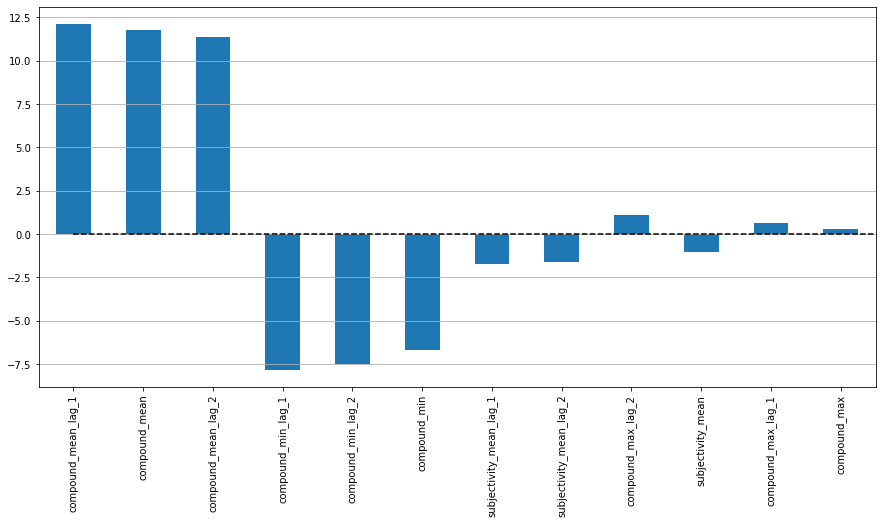

In [105]:
plotCoef(ridge_n['model'], X_train_n)

coefs = ridge_n['model'].coef_
ridge_coefs = pd.DataFrame({'Coef': coefs,
                           'Name': list(X_train_n.columns)})
ridge_coefs["abs"] = ridge_coefs.Coef.apply(np.abs)
ridge_coefs = ridge_coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
ridge_coefs

In [106]:
mape(y_test, ridge_n.predict(X_test_n))

45.25108401637926

In [107]:
xgb_param = {'model__lambda': list(np.arange(1,10, 1)), #L2 regularisation
             'model__alpha': list(np.arange(1,10, 1)),  #L1 regularisation
            }
xgb = XGBRegressor(booster='gblinear', feature_selector='shuffle', objective='reg:squarederror')

pipe = Pipeline([
    ('scale', scaler),
    ('model', xgb)])
gridsearch_xgb = GridSearchCV(estimator=pipe,
                          param_grid = xgb_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4,
                          verbose=3
                         )
gridsearch_xgb.fit(X_train_n, y_train_n)
xgb_n = gridsearch_xgb.best_estimator_

#get cv results of the best model + confidence intervals
cv_score = cross_val_score(xgb_n, X_train_n, y_train_n, cv=tscv, scoring=scorer)
nlp_perf = nlp_perf.append({'Model':'XGB', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}, ignore_index=True)
xgb_n

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 712 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:    5.0s finished


Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 XGBRegressor(alpha=5, base_score=0.5, booster='gblinear',
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, feature_selector='shuffle',
                              gamma=None, gpu_id=-1, importance_type='gain',
                              interaction_constraints=None, lambda=1,
                              learning_rate=0.5, max_delta_step=None,
                              max_depth=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              n_estimators=100, n_jobs=0,
                              num_parallel_tree=None, random_state=0,
                              reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
                              subsample=None, tree_method=None,
                              validate_parameters=1, verbosity=None))])

In [108]:
print(nlp_perf)

   Model           MSE            SD
0  Ridge  18913.709029  24855.227437
1    XGB  18913.753908  24855.220362


In [118]:
prediction_compare = pd.DataFrame(pd.DataFrame(columns=['nlp_r', 'nlp_x']))
prediction_compare['y_true'] = y_test
prediction_compare['nlp_r'] = ridge_n.predict(X_test_n)
prediction_compare['nlp_x'] = xgb_n.predict(X_test_n)
prediction_compare.sample(3)

,nlp_r,nlp_x,y_true
1982,363.329574,342.604279,684.109985
1798,336.319235,333.739990,645.440002
1642,331.843630,338.199677,534.622192


In [119]:
342.604279/684.109985

0.5008029213314289

In [120]:
363.329574/684.109985

0.5310981888387435